In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as st

In [9]:
data = pd.read_csv("walmart_data.csv")

In [10]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [11]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [12]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [13]:
data.groupby("Gender")["Purchase"].mean()-data.groupby("Gender")["Purchase"].median()

Gender
F     820.565765
M    1339.526040
Name: Purchase, dtype: float64

Male have higher difference in Mean and Median values than Females

<AxesSubplot:xlabel='Age', ylabel='count'>

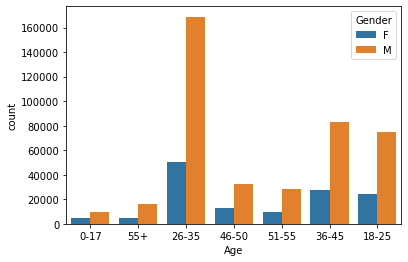

In [14]:
sns.countplot(x="Age",data=data,hue="Gender")

We need to acquire more customers above 35 and less than 26

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

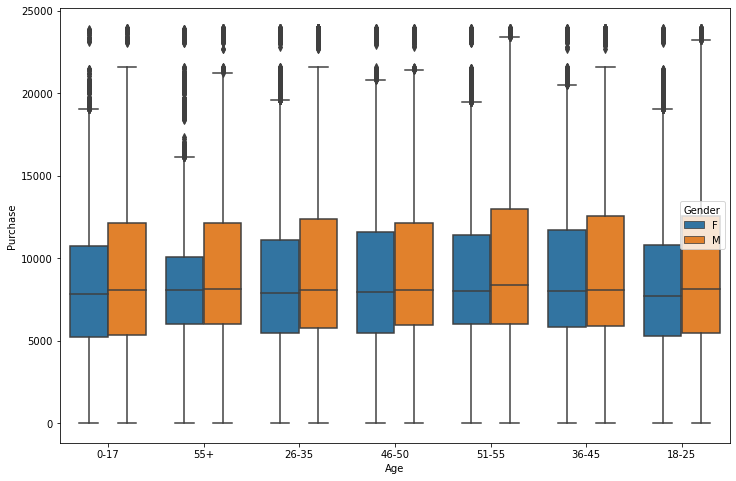

In [15]:
figure(figsize=(12,8))
sns.boxplot(x="Age",y="Purchase",data=data,hue="Gender")

In [16]:
data.groupby(["Gender"])["Purchase"].sum()/data["Gender"].value_counts()

F    8734.565765
M    9437.526040
dtype: float64

Male spend more on Black Friday then Female on Average

<AxesSubplot:xlabel='Age', ylabel='Occupation'>

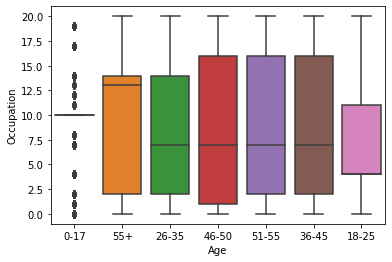

In [17]:
sns.boxplot(x="Age",y="Occupation",data = data)

4 is the most common occupation in people in age group 18-25 so we need to increase people in other occupations

In [46]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [48]:
data[data["Gender"]=="M"]["Purchase"].max()

23961

In [49]:
data[data["Gender"]=="F"]["Product_Category"]

0          3
1          1
2         12
3         12
14         5
          ..
550061    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category, Length: 135809, dtype: int64